<a href="https://colab.research.google.com/github/josefrancisco81788/Python-Projects/blob/main/Case_Stock_Price_Prediction_(LSTM_and_ARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction Using Historical Data

Source: Kaggle (Yahoo Finance Stock Exchange Data)

Project Overview

Objective: Predict future stock prices using historical stock market data.

Dataset: Historical stock prices from Yahoo Finance.

Technical Skills: Time series analysis, machine learning (LSTM, ARIMA), feature engineering, data visualization.

Community Contribution: Share code on GitHub, write a blog post detailing the prediction process and models used, and create interactive plots.

Real-World Application: Assist investors and financial analysts in making informed decisions based on predictive insights.

# Install libraries

In [ ]:
!pip install yfinance pandas numpy matplotlib sklearn tensorflow statsmodels

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Import Libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Data Collection

Gathers Apple (APPL) stock data from Yahoo Finance from Jan 1, 2021 to Jan 1, 2023.

In [ ]:
# Download historical data for a specific stock
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


# Data Preprocessing

Transform data from base closing price historical data to soemthing more compatible with LSTM.

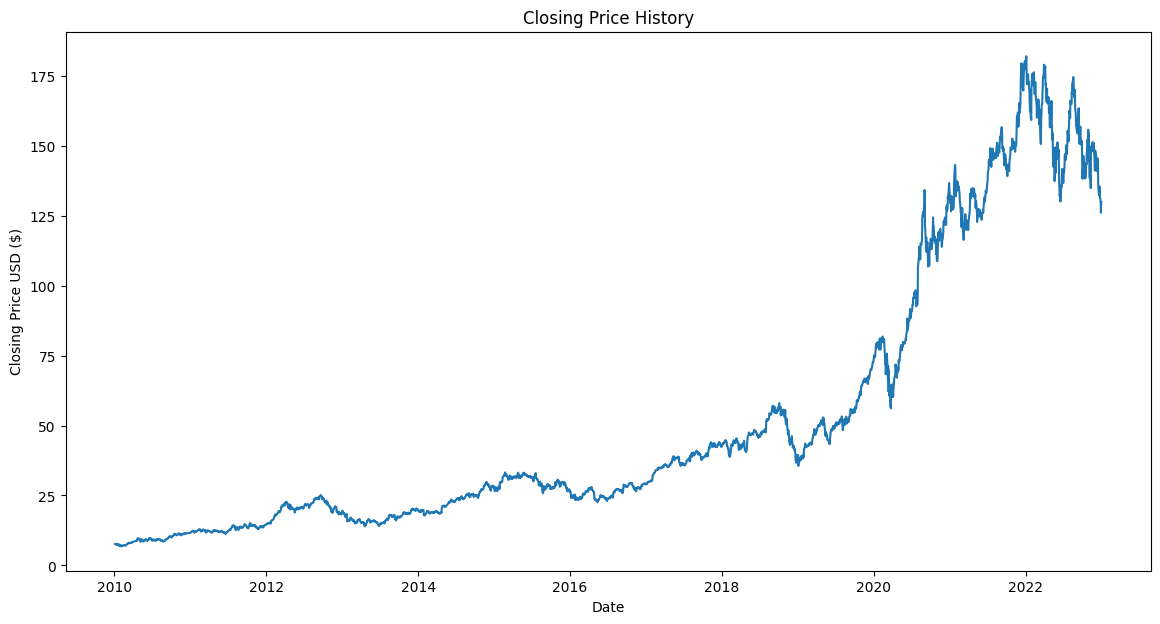

In [ ]:
# Visualize closing price history
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'])
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
plt.show()

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

# Create a dataset with 60 timesteps and 1 output
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape input for LSTM format [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
training_size = int(len(X) * 0.80)
X_train, X_test = X[:training_size], X[training_size:]
y_train, y_test = y[:training_size], y[training_size:]

# LSTM Model

LSTM (Long Short-Term Memory) models are a neural network type ideal for processing and making predictions based on time series data or sequences and thus work well for this situation.

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - loss: 0.0033
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 1.9629e-04
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 1.5831e-04
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - loss: 1.4959e-04
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - loss: 1.2691e-04
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 1.2014e-04
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 1.1964e-04
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - loss: 1.2626e-04
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - loss: 9.8090e-05
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - loss: 9.2120e-05
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


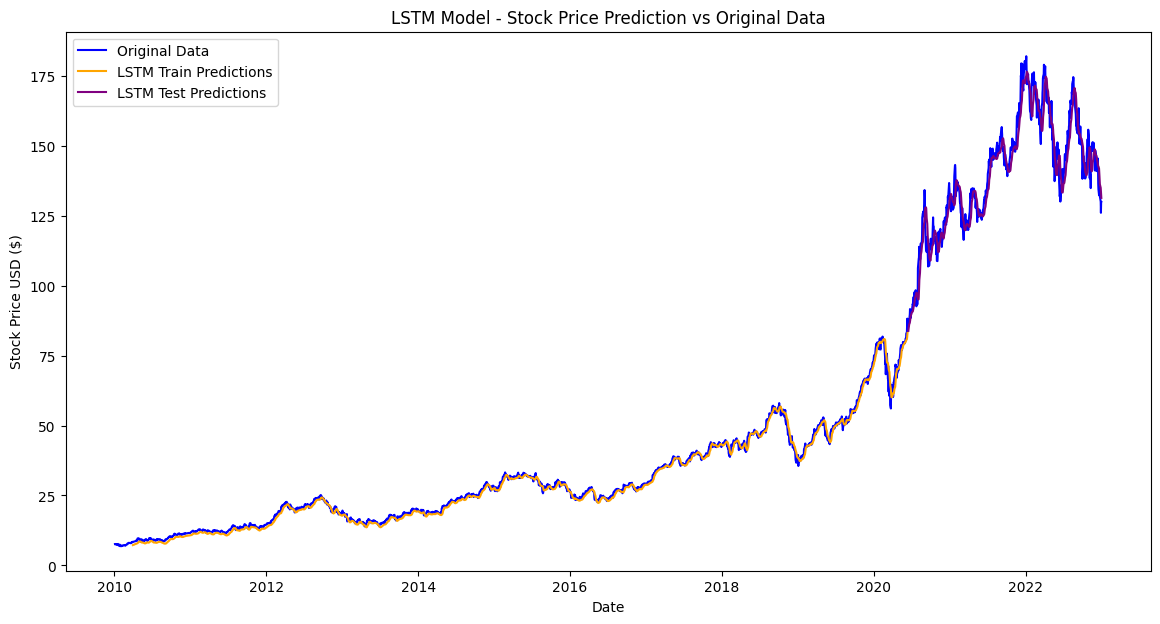

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(time_step, 1)))
lstm_model.add(LSTM(100, return_sequences=True))
lstm_model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
lstm_model.add(LSTM(100, return_sequences=False))
lstm_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
history = lstm_model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

# Generate LSTM predictions
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Create arrays for plotting
train_predict_plot = np.empty_like(stock_data['Close'])
train_predict_plot[:] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step] = train_predict[:, 0]

test_predict_plot = np.empty_like(stock_data['Close'])
test_predict_plot[:] = np.nan

# Calculate the correct number of elements available in the slice
start_index = len(stock_data) - len(test_predict)
end_index = len(stock_data)

# Assign `test_predict` values to fit correctly into the plot
test_predict_plot[start_index:end_index] = test_predict[:, 0]


# Plot the original data, training predictions, and test predictions on a single graph
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Original Data', color='blue')            # Use index as x-axis for the original data
plt.plot(stock_data.index, train_predict_plot, label='LSTM Train Predictions', color='orange')    # Use index for training predictions
plt.plot(stock_data.index, test_predict_plot, label='LSTM Test Predictions', color='purple')      # Use index for test predictions

# Add titles and labels
plt.title('LSTM Model - Stock Price Prediction vs Original Data')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend()
plt.show()

# SARIMAX Model

ARIMA (AutoRegressive Integrated Moving Average) models are a type of statistical model used to analyze and forecast time series data - and so are ideal for this situation.

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00


In [ ]:
# Define the training and testing data for SARIMAX
train_data, test_data = stock_data['Close'][:training_size], stock_data['Close'][training_size:]

from statsmodels.tsa.stattools import adfuller

# Test for stationarity on the original stock data
result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, data is not stationary (which means its mean, variance, and autocorrelation change over time). Depending on degree of difference, d=1 or d=2

ADF Statistic: -1.093120281976456
p-value: 0.7178076446451463


In [ ]:
# Apply differencing based on ADF p-value
if result[1] > 0.05:
    train_data_diff = train_data.diff().dropna()
    result_diff = adfuller(train_data_diff)
    print('Differencing ADF Statistic:', result_diff[0])
    print('Differencing p-value:', result_diff[1])

    # Continue differencing if necessary
    if result_diff[1] > 0.05:
        train_data_diff = train_data_diff.diff().dropna()
        print('Second Differencing Applied')
else:
    train_data_diff = train_data

Differencing ADF Statistic: -6.847435003961279
Differencing p-value: 1.7283780333458142e-09


Use d=None as default in order to explore different stationary handling methods.

In [ ]:
from pmdarima import auto_arima

# Use auto_arima to find the best ARIMA and seasonal parameters
# Process note: The final value I ended up using was order=(2, 1, 2) seasonal_order=(1, 1, 1, 12) - which was just one set of "best" values
model_auto_sarima = auto_arima(train_data_diff, start_p=1, start_q=1,
                               max_p=5, max_q=5, seasonal=True, m=12,
                               start_P=1, start_Q=1, max_P=3, max_Q=3,
                               d=None, # Allow auto selection of differencing
                               D=1, trace=True, stepwise=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=45.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5949.137, Time=0.41 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5453.209, Time=3.79 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5947.152, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5941.227, Time=0.47 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5247.495, Time=11.57 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=5166.719, Time=19.14 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=97.43 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=58.07 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=5213.208, Time=15.75 sec
 ARIMA(2,0,0)(3,1,0)[12] intercept   : AIC=5168.401, Time=27.94 sec
 ARIMA(1,0,1)(3,1,0)[12] intercept   : AIC=5168.428, Time=59.63 sec
 ARIMA(0,0,1)(3,1,0)[12] intercept   : AIC=5166.624, Time=23.03 sec
 ARIMA(0,0,1)(2,1,0)[12] inte

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 2662
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -2420.358
Date:                              Wed, 16 Oct 2024   AIC                           4854.716
Time:                                      14:39:59   BIC                           4895.850
Sample:                                  01-04-2010   HQIC                          4869.610
                                       - 03-17-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2070      0.186      1.115      0.265      -0.157       0.571
ar.L2         -0.14

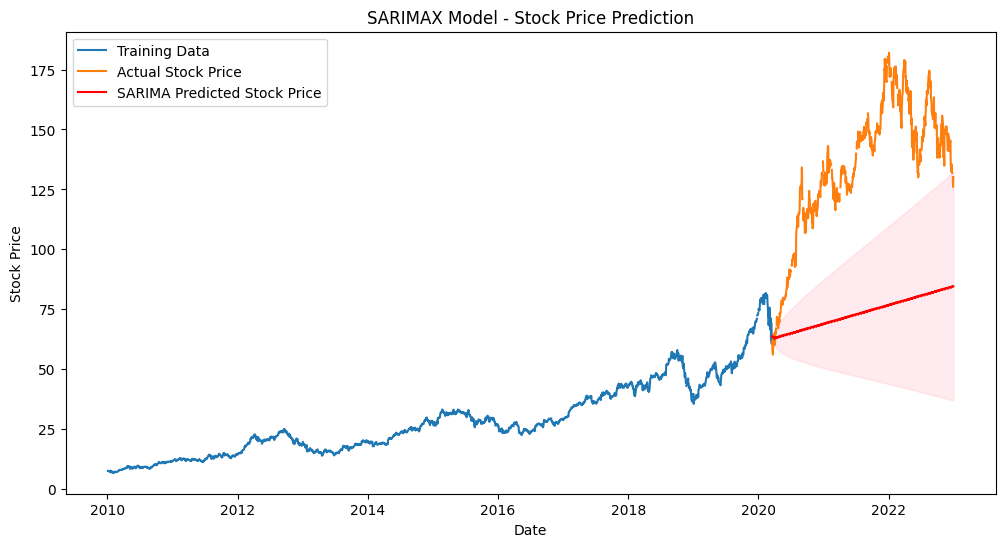

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set frequency to the date index to avoid warnings
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

train_data = train_data.asfreq('B')  # Assuming business day frequency
test_data = test_data.asfreq('B')

# Fit SARIMAX model based on auto_arima parameters
model_sarimax = SARIMAX(train_data,
                        order=(2, 1, 2),
                        #order=model_auto_sarima.order,
                        seasonal_order=(1, 1, 1, 12),
                        #seasonal_order=model_auto_sarima.seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
model_sarimax_fit = model_sarimax.fit()

# Make predictions
predictions_sarima = model_sarimax_fit.get_forecast(steps=len(test_data))
pred_ci = predictions_sarima.conf_int()

# Print the model summary
print(model_sarimax_fit.summary())

# Plot the predictions with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Stock Price')
plt.plot(test_data.index, predictions_sarima.predicted_mean, label='SARIMA Predicted Stock Price', color='red')
plt.fill_between(test_data.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('SARIMAX Model - Stock Price Prediction')
plt.legend()
plt.show()

# Model Evaluation and Visualization

Visual representation of prediction effectiveness.

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
LSTM Train RMSE: 16.31760975354487
LSTM Test RMSE: 134.430966689726
SARIMA Test RMSE: 302.98496126358043


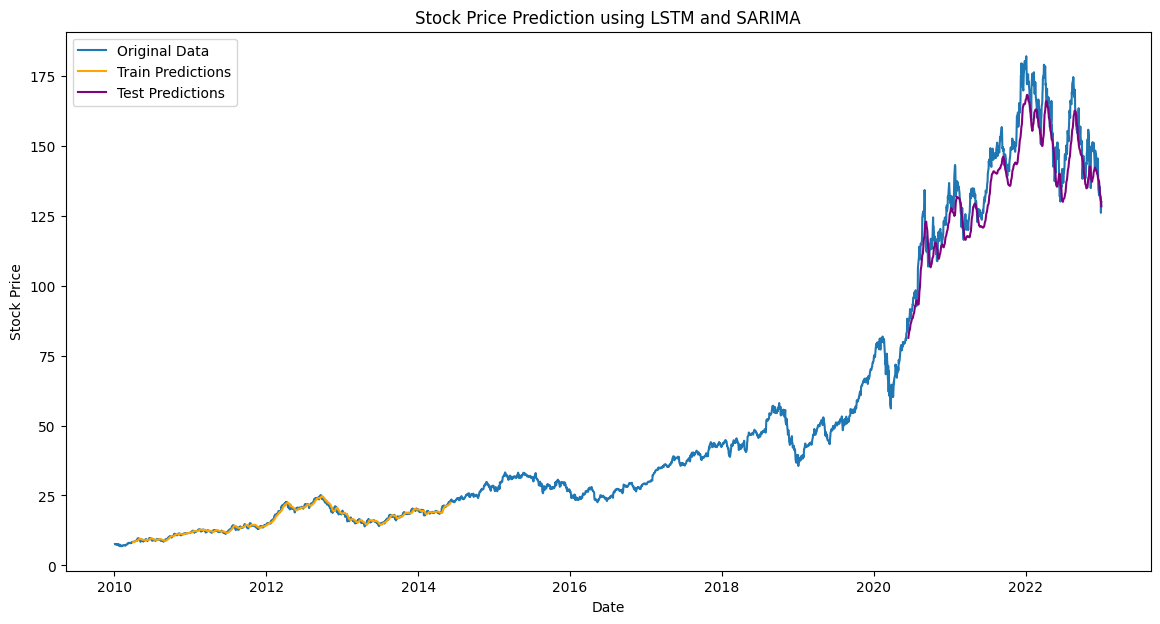

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Check if model is defined and has been fitted
# Get the models' predictions
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE for LSTM
train_rmse_lstm = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse_lstm = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'LSTM Train RMSE: {train_rmse_lstm}')
print(f'LSTM Test RMSE: {test_rmse_lstm}')

# Handle NaNs in SARIMA predictions and test data
valid_mask = ~np.isnan(predictions_sarima) & ~test_data.isna()
filtered_test_data = test_data[valid_mask]
filtered_predictions_sarima = predictions_sarima[valid_mask]

# Evaluate SARIMA Model
sarima_rmse = np.sqrt(mean_squared_error(filtered_test_data, filtered_predictions_sarima))
print(f'SARIMA Test RMSE: {sarima_rmse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Original Data')

# Plot LSTM predictions
train_predict_plot = np.empty_like(stock_data['Close'])
train_predict_plot[:] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step] = train_predict[:, 0]

test_predict_plot = np.empty_like(stock_data['Close'])
test_predict_plot[:] = np.nan
start_index = len(stock_data) - len(test_predict)
test_predict_plot[start_index:] = test_predict[:, 0]

plt.plot(stock_data.index, train_predict_plot, label='Train Predictions', color='orange')
plt.plot(stock_data.index, test_predict_plot, label='Test Predictions', color='purple')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM and SARIMA')
plt.legend()
plt.show()

# Model Comparison Results

**Results Evaluation:**

LSTM Train RMSE: 16.31760975354487

LSTM Test RMSE: 134.430966689726

SARIMA Test RMSE: 302.98496126358043

**LSTM Train and Test RMSE**

LSTM Train RMSE: 16.31: This indicates that the model's error on the training set is relatively low. The low train RMSE suggests that the LSTM model has learned well from the training data.

LSTM Test RMSE: 134.43: The significant increase in test RMSE compared to train RMSE suggests overfitting. The model performs well on the training set but struggles to generalize to unseen data. Overfitting can occur if the model is too complex, has too many parameters, or if there is insufficient regularization.

Possible measures to reduce overfitting:

*   Increase dropout rates.
*   Reduce the complexity of the model (e.g., fewer LSTM layers or units)
*   Collect more training data.
*   Apply L2 regularization to the weights.

**SARIMAX Test RMSE**

SARIMA Test RMSE: 302.98: This error is significantly higher than that of the LSTM model. Several factors could contribute to the poor performance of SARIMAX:
Non-stationary Data: Stock price data often contains trends and volatility that make it challenging to model with a SARIMA model, which assumes stationarity.
Order Parameters: Even though auto_arima was used to determine the parameters, it might not have found the best combination for capturing complex dependencies in the stock prices.

Lack of Exogenous Variables: Stock prices are influenced by many factors (e.g., macroeconomic indicators, financial news). SARIMAX, without exogenous variables, may struggle to capture all the dynamics.

**Conclusion**

The LSTM model performs better on test data compared to SARIMA, indicating that LSTM may be better suited for capturing the non-linear and sequential nature of stock price data.
Overfitting is a concern for the LSTM model, as evident from the large gap between train and test RMSE. Regularization, more data, or simpler models could help mitigate this.
The SARIMA model has difficulty predicting accurately, likely due to the complexity of stock price data. We might want to include exogenous variables or consider other models, like a more sophisticated recurrent neural network or gradient boosting models.